<a href="https://colab.research.google.com/github/baihelahusain/Unified-Mentor/blob/main/Olympics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Importing all the necessay libraries:**

In [29]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [10]:
import pandas as pd
df = pd.read_csv('/content/olympic.csv', encoding='latin1')



In [11]:
df.head()

,City,Year,Sport,Discipline,Event,Athlete,Gender,Country_Code,Country,Event_gender,Medal
0,Montreal,1976.0,Aquatics,Diving,3m springboard,"KÖHLER, Christa",Women,GDR,East Germany,W,Silver
1,Montreal,1976.0,Aquatics,Diving,3m springboard,"KOSENKOV, Aleksandr",Men,URS,Soviet Union,M,Bronze
2,Montreal,1976.0,Aquatics,Diving,3m springboard,"BOGGS, Philip George",Men,USA,United States,M,Gold
3,Montreal,1976.0,Aquatics,Diving,3m springboard,"CAGNOTTO, Giorgio Franco",Men,ITA,Italy,M,Silver
4,Montreal,1976.0,Aquatics,Diving,10m platform,"WILSON, Deborah Keplar",Women,USA,United States,W,Bronze


In [12]:
df.tail()

,City,Year,Sport,Discipline,Event,Athlete,Gender,Country_Code,Country,Event_gender,Medal
15428,Beijing,2008.0,Wrestling,Wrestling Gre-R,66 - 74kg,"GUENOT, Christophe",Men,FRA,France,M,Bronze
15429,Beijing,2008.0,Wrestling,Wrestling Gre-R,66 - 74kg,"KVIRKELIA, Manuchar",Men,GEO,Georgia,M,Gold
15430,Beijing,2008.0,Wrestling,Wrestling Gre-R,55 - 60kg,"RAHIMOV, Vitaliy",Men,AZE,Azerbaijan,M,Silver
15431,Beijing,2008.0,Wrestling,Wrestling Gre-R,60 - 66kg,"GUENOT, Steeve",Men,FRA,France,M,Gold
15432,Beijing,2008.0,Wrestling,Wrestling Gre-R,96 - 120kg,"LOPEZ, Mijain",Men,CUB,Cuba,M,Gold


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15433 entries, 0 to 15432
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   City          15316 non-null  object 
 1   Year          15316 non-null  float64
 2   Sport         15316 non-null  object 
 3   Discipline    15316 non-null  object 
 4   Event         15316 non-null  object 
 5   Athlete       15316 non-null  object 
 6   Gender        15316 non-null  object 
 7   Country_Code  15316 non-null  object 
 8   Country       15316 non-null  object 
 9   Event_gender  15316 non-null  object 
 10  Medal         15316 non-null  object 
dtypes: float64(1), object(10)
memory usage: 1.3+ MB


# ***Data Cleaning***

In [15]:
df.isnull().sum()

,0
City,117
Year,117
Sport,117
Discipline,117
Event,117
Athlete,117
Gender,117
Country_Code,117
Country,117
Event_gender,117


In [16]:
df.shape

(15433, 11)

In [20]:
df_cleaned = df.dropna()

In [22]:
df_cleaned.isnull().sum()

,0
City,0
Year,0
Sport,0
Discipline,0
Event,0
Athlete,0
Gender,0
Country_Code,0
Country,0
Event_gender,0


In [23]:
df_cleaned.shape

(15316, 11)

In [24]:
df_cleaned.to_csv('cleaned_olympic.csv', index=False)

# ***EDA Of Olympics Data:***

In [61]:
medals_by_country = df_cleaned.groupby('Country')['Medal'].count().sort_values(ascending=False)
print(medals_by_country.head(30))

Country
United States     1992
Soviet Union      1021
Australia          798
Germany            691
China              679
Russia             638
East Germany       626
Italy              486
Romania            482
United Kingdom     467
Korea, South       454
France             449
Netherlands        428
Japan              388
Hungary            368
Cuba               349
West Germany       345
Spain              328
Brazil             318
Canada             304
Yugoslavia         278
Poland             263
Bulgaria           247
Unified team       223
Sweden             193
Norway             154
Argentina          153
Denmark            148
Ukraine            148
New Zealand        122
Name: Medal, dtype: int64


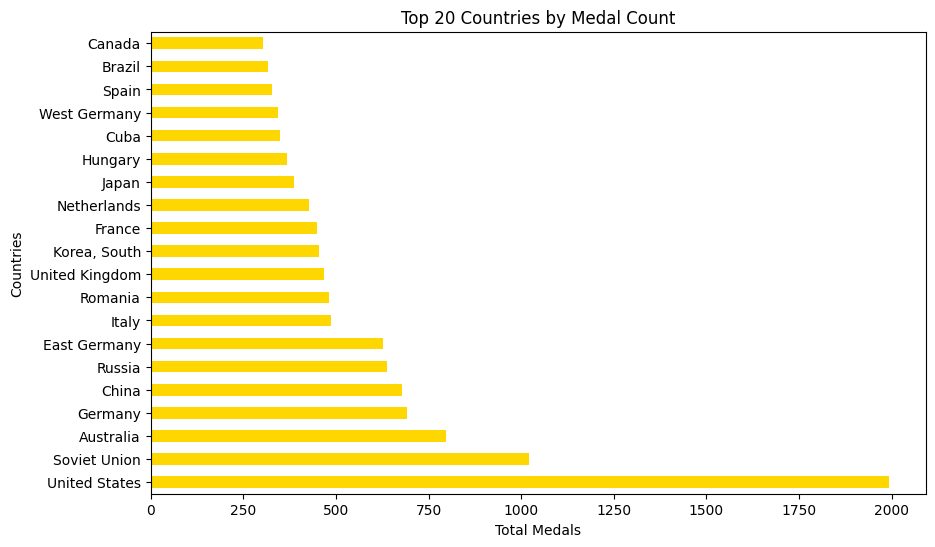

In [62]:
plt.figure(figsize=(10, 6))
medals_by_country.head(20).plot(kind='barh', color='gold')
plt.title("Top 20 Countries by Medal Count")
plt.xlabel("Total Medals")
plt.ylabel("Countries")
plt.show()

In [51]:
medals_over_years = df_cleaned.groupby('Year')['Medal'].count()

In [63]:
medals_over_years.head(20)

,Medal
Year,
1976.0,1305
1980.0,1387
1984.0,1459
1988.0,1546
1992.0,1705
1996.0,1859
2000.0,2015
2004.0,1998
2008.0,2042


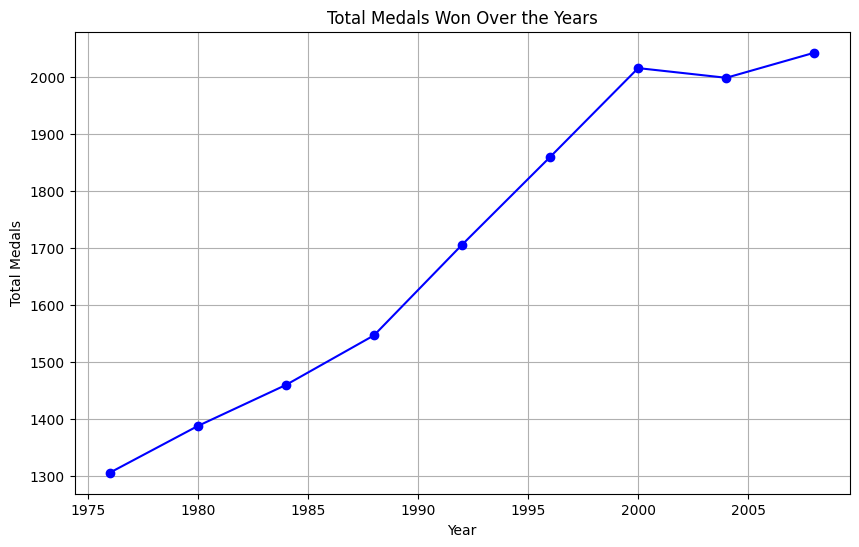

In [64]:
plt.figure(figsize=(10, 6))
plt.plot(medals_over_years.index,
medals_over_years.values,marker='o', linestyle='-', color='b')
plt.title("Total Medals Won Over the Years")
plt.xlabel("Year")
plt.ylabel("Total Medals")
plt.grid(True)
plt.show()

In [69]:
gender_distribution = df_cleaned['Gender'].value_counts()

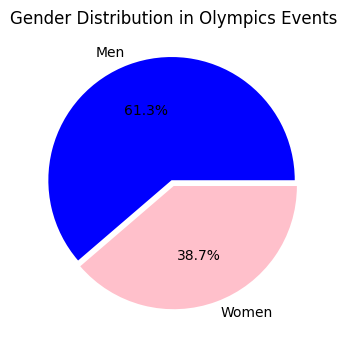

In [79]:
plt.figure(figsize=(6, 4))
gender_distribution.plot(kind='pie',autopct='%1.1f%%', colors=['blue','pink'], explode = [0.05,0])
plt.title("Gender Distribution in Olympics Events")
plt.ylabel('')
plt.show()

In [80]:
athlete_medal_count=df_cleaned.groupby('Athlete')['Medal'].count().sort_values(ascending=False)


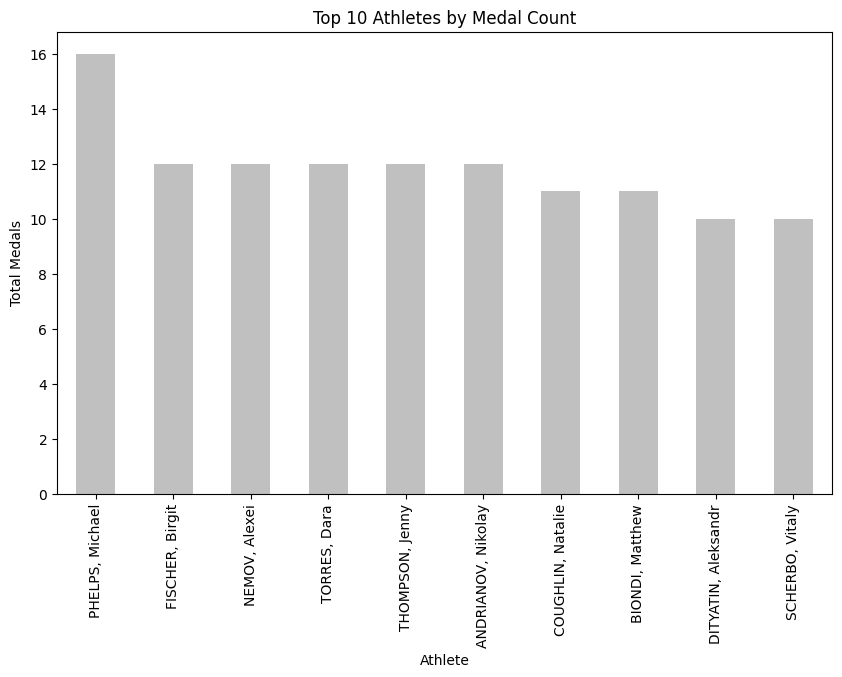

In [81]:
plt.figure(figsize=(10, 6))
athlete_medal_count.head(10).plot(kind='bar', color='silver')
plt.title("Top 10 Athletes by Medal Count")
plt.xlabel("Athlete")
plt.ylabel("Total Medals")
plt.show()




# ***Predictive Modeling:***



